In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [39]:
# Loading dataset
data = pd.read_csv('C:/Users/Public/winequality_red.csv')

In [40]:
# Preprocessing dataset and 
# Remove NaN values
data = data.dropna()

In [41]:
# Inspecting data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [42]:
# Descriptive statistics
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         


Skewness:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Kurtosis:
fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131

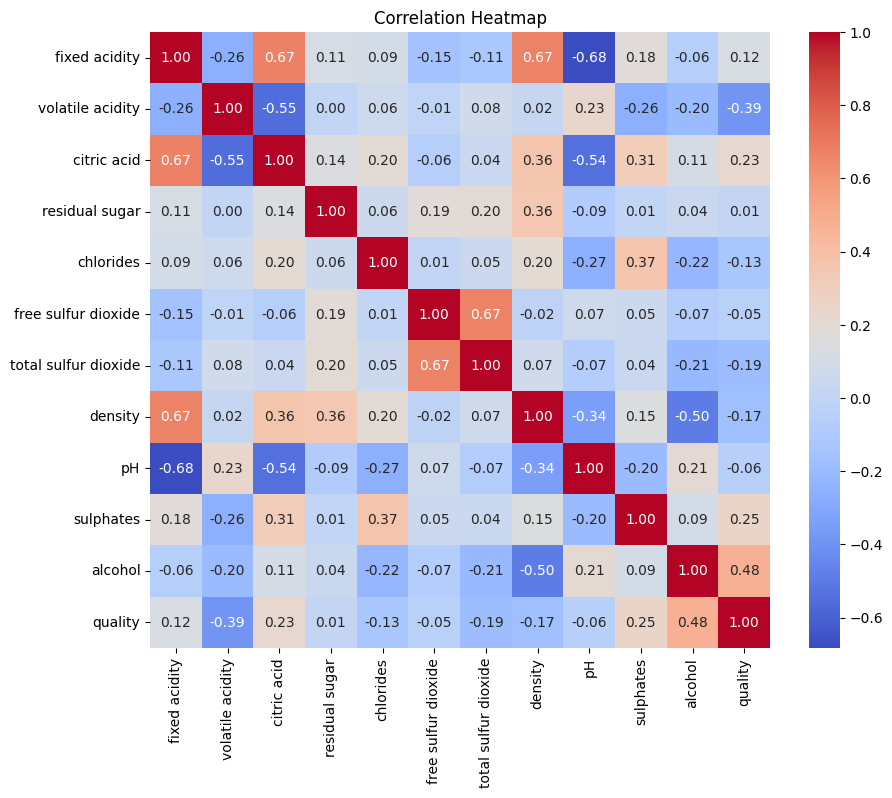

In [43]:
# Displaying additional statistics
def display_statistics(data):
    """
    Function to plot correlation heatmap ans other stats.
    """
    skewness = data.skew()
    kurtosis = data.kurtosis()
    print("\nSkewness:")
    print(skewness)
    print("\nKurtosis:")
    print(kurtosis)

    correlation_matrix = data.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.savefig("heatmap.png")
    plt.show()

display_statistics(data)

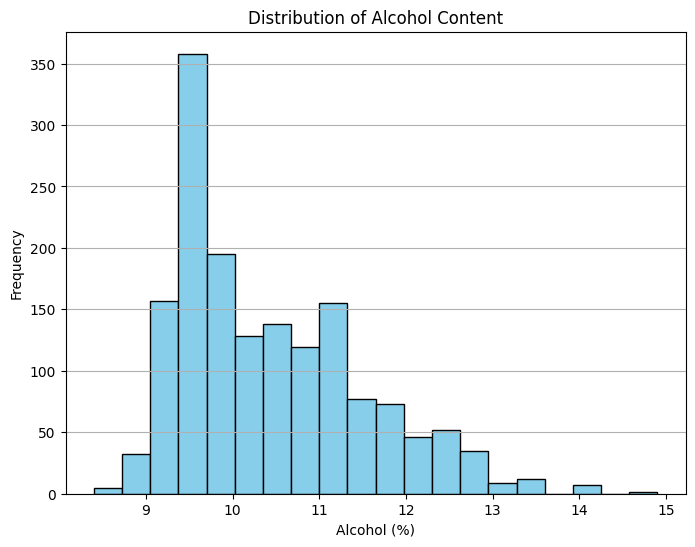

In [37]:
# function to plot histogram

def plot_histogram(data, column, title, xlabel, ylabel):
    """
    Function to plot a histogram plot for the distribution of Alcohol Content.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y')
    plt.savefig("histogram.png")
    plt.show()

plot_histogram(data, 'alcohol', 'Distribution of Alcohol Content', 'Alcohol (%)', 'Frequency')

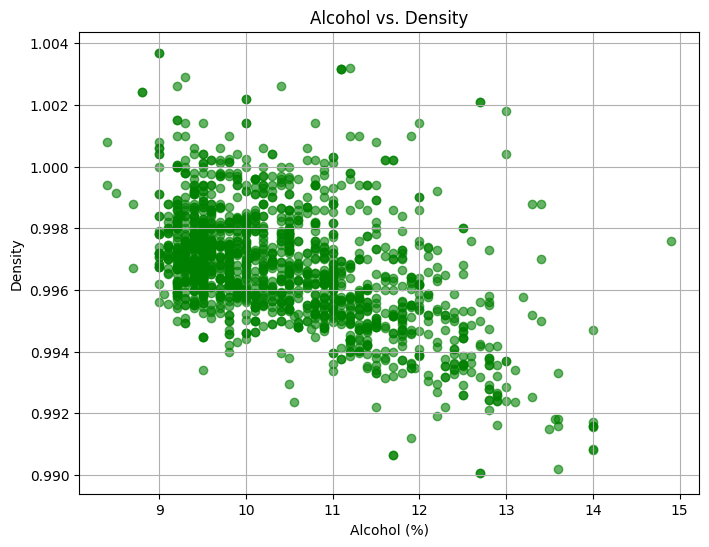

In [44]:
# Function to plot scatter plot for Alcohol vs Density
def plot_scatter_alcohol_density(data, x_col, y_col, title, xlabel, ylabel):
    """
    Function to plot a scatter plot of Alcohol vs Density.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c='green', alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig("Scatter_Alcohol.png")
    plt.show()  # Show plot immediately after creation

# Plot scatter for Alcohol vs Density
plot_scatter_alcohol_density(data, 'alcohol', 'density', 'Alcohol vs. Density', 'Alcohol (%)', 'Density')

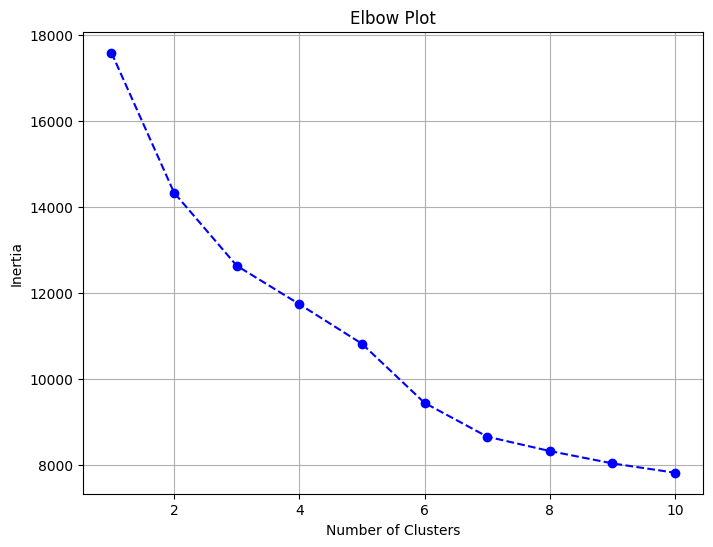

In [45]:
# Function to perform Elbow Method for optimal k
def plot_elbow_method(data):
    """
    Function to plot Elbow Method to find optimal number of clusters.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop('quality', axis=1))

    inertia = []
    k_values = range(1, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid()
    plt.savefig("elbow_plt.png")
    plt.show()  # Show plot immediately after creation
    
    return data_scaled

# Display Elbow Method plot
data_scaled = plot_elbow_method(data)

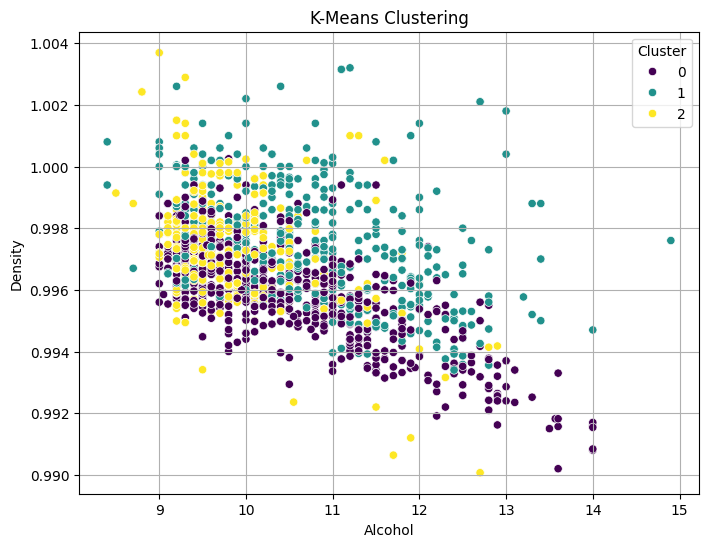

In [46]:
# Function to display kmeans clustering
def plot_kmeans_clusters(data, data_scaled, x_col, y_col, optimal_k):
    """
    Function to perform KMeans clustering and plot the clusters.
    """
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue='Cluster', palette='viridis')
    plt.title("K-Means Clustering")
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.legend(title="Cluster")
    plt.grid()
    plt.savefig("KMeans_clustering.png")
    plt.show()  # Show plot immediately after creation

# Display KMeans clusters plot
plot_kmeans_clusters(data, data_scaled, 'alcohol', 'density', optimal_k=3)

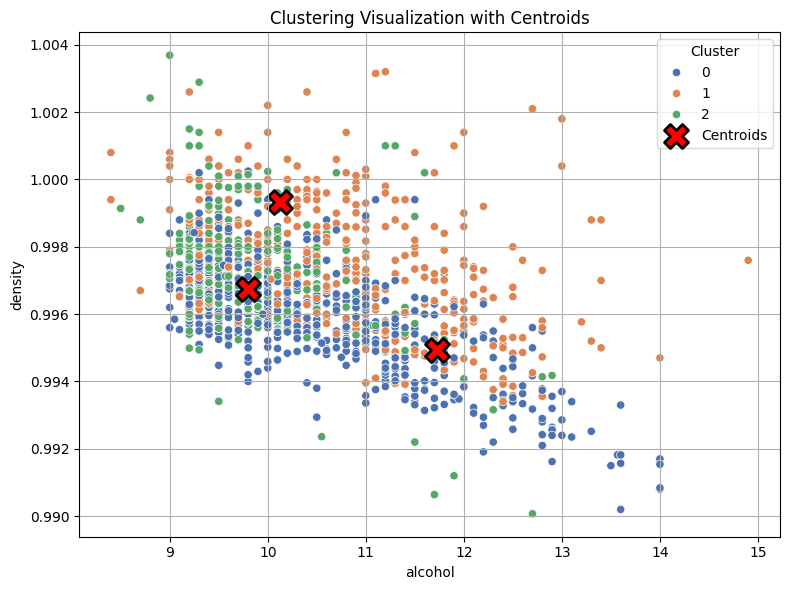

In [47]:
# Function to visualize clustering with centroids
def visualize_clusters_with_centroids(data, x_col, y_col, cluster_col, kmeans_model, scaler, title="Clustering Visualization with Centroids"):
    """
    Function to visualize clusters with centroids.
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of data points, colored by cluster
    sns.scatterplot(
        x=data[x_col], 
        y=data[y_col], 
        hue=data[cluster_col], 
        palette='deep', 
        legend='full'
    )
    
    # Unscaling centroids to the original data space
    centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)  # Convert centroids back to original scale
    
    # Highlighting centroids on the scatter plot
    plt.scatter(
        centroids[:, 0],  # X-coordinates (alcohol)
        centroids[:, 1],  # Y-coordinates (density)
        s=300,            # Increasing size to highlight centroids
        c='red',          # coloring Red
        label='Centroids', 
        marker='X',       # Using a distinct marker for centroids
        edgecolor='black', # For visibility
        linewidth=2       # thickness of edge
    )
    
    # Customizing the plot
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Cluster', loc='best')
    plt.savefig("cluster_centroids.png")
    plt.show()  # Showing the plot

# Visualizing clusters with centroids
visualize_clusters_with_centroids(
    data, 
    'alcohol', 
    'density', 
    'Cluster', 
    kmeans_model, 
    scaler
)

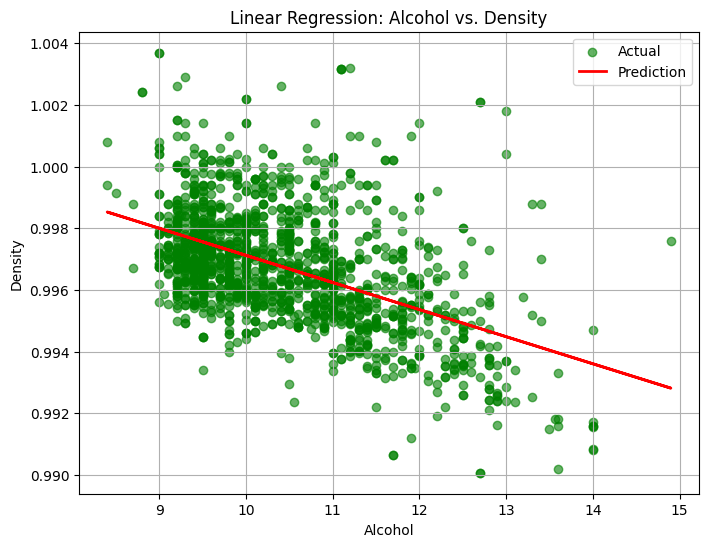

R-squared for alcohol vs density: 0.25


In [48]:
# Function to plot linear regression for Alcohol vs Density
def plot_linear_regression_alcohol_density(data, x_col, y_col):
    """
    Function to perform and plot Linear Regression for Alcohol vs Density.
    """
    X = data[[x_col]]
    y = data[y_col]

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='green', alpha=0.6, label="Actual")
    plt.plot(X, predictions, color='red', linewidth=2, label="Prediction")
    plt.title(f"Linear Regression: {x_col.capitalize()} vs. {y_col.capitalize()}")
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.legend()
    plt.grid(True)
    plt.savefig("Model_fit.png")
    plt.show()  # Show plot immediately after creation

    r_squared = model.score(X, y)
    print(f"R-squared for {x_col} vs {y_col}: {r_squared:.2f}")

# Displaying linear regression plot and R-squared value
plot_linear_regression_alcohol_density(data, 'alcohol', 'density')